# Assignment 2. 캐글 경진대회 참여
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew 

In [2]:
test = pd.read_csv('test_new.csv') 
train = pd.read_csv('train_new.csv') 

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,20,RL,NaN,6897,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.751950
856,857,80,RL,NaN,10970,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,11.898195
857,858,60,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,12.066816
858,859,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Family,11.931642


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal
1,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
2,863,20,RL,81.0,9672,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,5,2010,WD,Normal
3,864,20,RL,70.0,7931,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2009,WD,Normal
4,865,20,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
596,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
597,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
598,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (860, 81) 
The test data size before dropping Id feature is : (600, 80) 

The train data size after dropping Id feature is : (860, 80) 
The test data size after dropping Id feature is : (600, 79) 


# <span style="color:blue"> Data Processing 전처리 같이 해봅시다

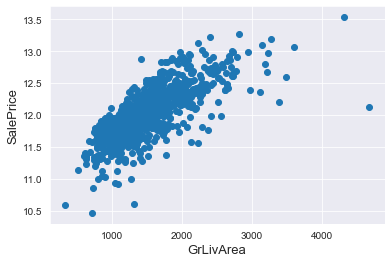

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**Q1. 위 그림에서 이상치로 판단되는 데이터를 제거하시오.**

**사람마다 기준은 다르나 저는 오른쪽 따로노는 아이가 이상하군요....?**

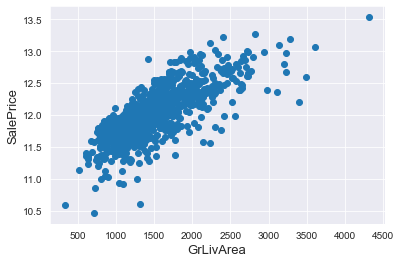

In [7]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<12.5)].index)


#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

문제 조건에 맞게 오른쪽에 떨어져있는 하나의 값만 drop

## Features engineering

In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1459, 79)


### Missing Data

In [9]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520219
MiscFeature,96.298835
Alley,93.762851
Fence,80.740233
FireplaceQu,47.292666
LotFrontage,17.751885
GarageYrBlt,5.551748
GarageType,5.551748
GarageQual,5.551748
GarageFinish,5.551748


Text(0.5, 1.0, 'Percent missing data by feature')

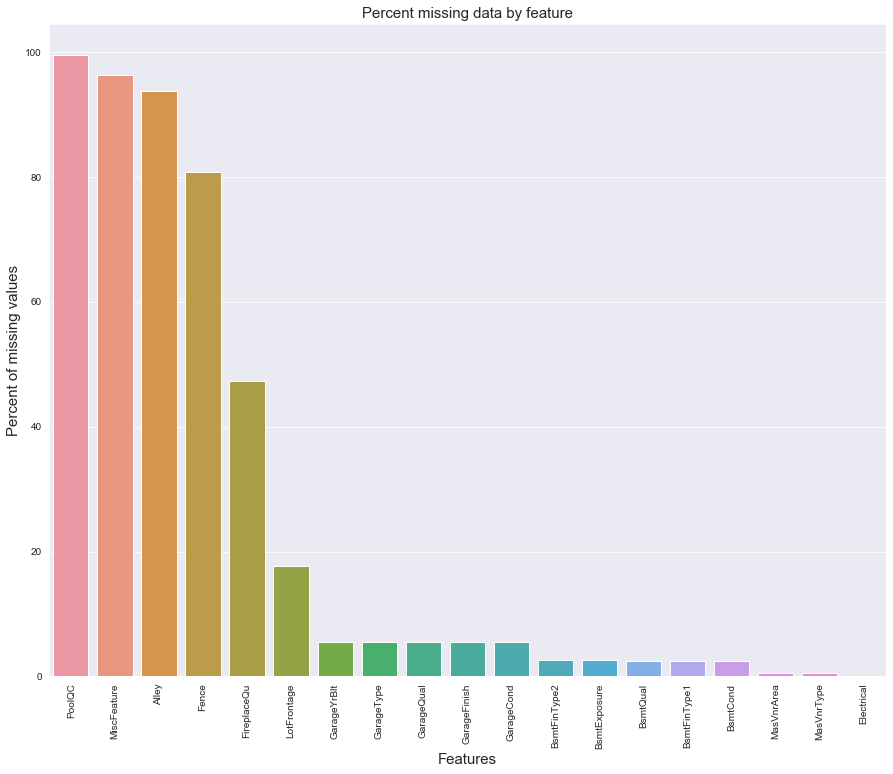

In [10]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Data Correlation**


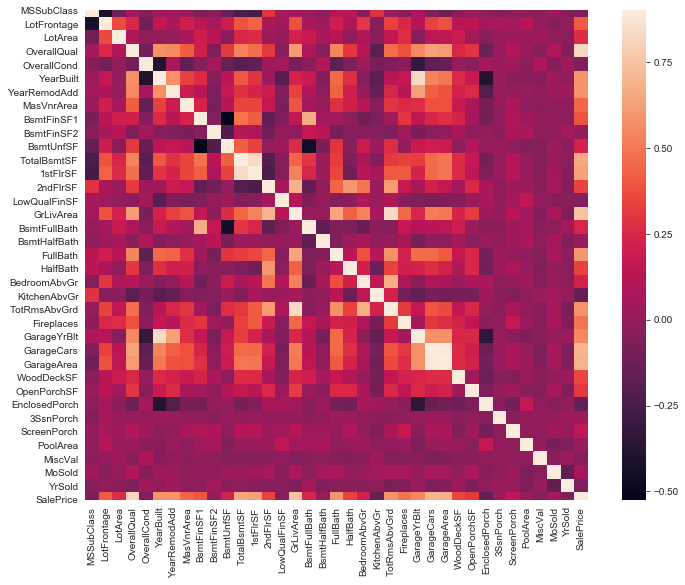

In [11]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Imputing missing values 

**Q3.결측치를 None으로 바꿔봅시다**  
**그냥 바꾸지만 마시고 왜 None으로 바꾸는지 한번 생각해보세요**

- **PoolQC** : data description says NA means "No  Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

In [12]:
all_data["PoolQC"].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1454    NaN
1455    NaN
1456    NaN
1457    NaN
1458    NaN
Name: PoolQC, Length: 1459, dtype: object>

In [13]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

- **MiscFeature** : data description says NA means "no misc feature"


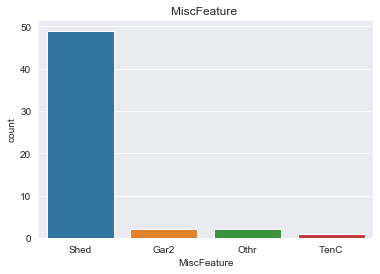

In [14]:
sns.countplot(x="MiscFeature", data=all_data)
plt.title("MiscFeature ")
plt.show()

In [15]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

None의 의미가  'misc feature없음'이므로 결측치이다. 

- **Alley** : data description says NA means "no alley access"

In [16]:
all_data["Alley"] = all_data["Alley"].fillna("None")

- **Fence** : data description says NA means "no fence"

In [17]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **FireplaceQu** : data description says NA means "no fireplace"

In [18]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

**A3. 위의 data의 결측치를 모두 None으로 치환
결측치를 한번에 처리하기 위하여 None으로 통일하였습니다.**

- **LotFrontage** : 

 **Q4. the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood. 인 변수입니다. 그러면 결측치를 어떻게 바꾸는게 좋을까요?**

In [19]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.mean())


Transformation : 그룹 별 계산을 수행하고 생성된 객체를 반환

**A4. 집과 연결된 각 거리의 지역은 그 지역의 다른 집과 비슷한 지역 일 가능성이 높기 때문에 data를 그룹화 해줍니다. Q4의 경우, data 내 NaN을 각 그룹에서 파생된 mean 값으로 치환했습니다.**




https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

- **Q5. GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

In [20]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

**A5. fillna를 이용해 결측치를 None으로 치환하였습니다.**

- **Q6. GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

**A5. fillna를 이용해 결측치를 0로 치환하였습니다.**

- **Q7. BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- **Q8. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.


In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna(0)

- **Q9. MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 


In [24]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'  

**Q10. MSZoning에서 가장 많이 존재하는 값으로 결측치를 대체하세요**

In [25]:
all_data['MSZoning'].value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

RL이 최빈값입니다.

In [26]:
#최빈값만 return
all_data['MSZoning'].value_counts(dropna=True).idxmax()

'RL'

In [27]:
all_data.index[all_data['MSZoning'].isnull()]

Int64Index([], dtype='int64')

???결측치가 없낭?? 우선 최빈값으로 대치하장

In [28]:

most_freq = all_data['MSZoning'].value_counts(dropna=True).idxmax()

all_data['MSZoning'].fillna(most_freq, inplace = True)

**A10. 최빈값을 return하는 함수(value_counts(dropna=True).idxmax())를 사용하여 결측치를 처리했습니다.**

https://yganalyst.github.io/study/Pd_6/

- **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa"  and 2 NA . Since the house with 'NoSewa' is in the training set, **this feature won't help in predictive modelling**. We can then safely  remove it.


In [29]:
all_data = all_data.drop(['Utilities'], axis=1)

- **Functional** : data description says NA means typical

In [30]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


**Q11.  가장 많이 존재하는 값으로 결측치를 대체하세요**

In [31]:
all_data['Electrical'].fillna(all_data['Electrical'].value_counts(dropna=True).idxmax() , inplace = True)

- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.


In [32]:
all_data['KitchenQual'].fillna(all_data['KitchenQual'].value_counts(dropna=True).idxmax() , inplace = True)

- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string


In [33]:
all_data['Exterior1st'].fillna(all_data['Exterior1st'].value_counts(dropna=True).idxmax() , inplace = True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].value_counts(dropna=True).idxmax() , inplace = True)

- **SaleType** : Fill in again with most frequent which is "WD"

In [34]:
all_data['SaleType'].fillna(all_data['SaleType'].value_counts(dropna=True).idxmax() , inplace = True)

**A11. Q10과 동일하게 처리했습니다.**

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None


In [35]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Is there any remaining missing value ? 

In [36]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


결측치 처리 성공쓰~

### More features engeneering

**Transforming some numerical variables that are really categorical**   

숫자형태를 한 값일 뿐 실제 연속형도 숫자 데이터도 아니죠? 따라서 문자형식으로 바꾼후 라벨링 인코더 하겠습니다.

**Q12. 데이터를 문자형으로 바꾸세요.**

In [37]:
all_data['MSSubClass'].dtypes

dtype('int64')

In [38]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].astype('str')

In [39]:
all_data['MSSubClass'].dtypes

dtype('O')

In [40]:
type(all_data['MSSubClass'][0])

str

string으로 잘 변환되는것을 확인\


dtype('0') :\
Pandas dtype : object  \
Python type : str\
NumPy type :  string_, unicode_ \
Usage : Text
                         

https://stackoverflow.com/questions/37561991/what-is-dtypeo

In [41]:

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype('str')


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype('str')
all_data['MoSold'] = all_data['MoSold'].astype('str')

**A12. dtpye으로 series전체를 문자형으로 변환**

**Label Encoding some categorical variables that may contain information in their ordering set** 

**Q13. LabelEncoder로 해당 범주형 데이터를 바꿔보세요..**

In [42]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))


# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (1459, 78)


**Adding one more important feature**

In [43]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

**Skewed features**

In [44]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.443278
PoolArea,14.807992
LotArea,12.290047
3SsnPorch,10.290132
LowQualFinSF,8.998885
LandSlope,4.806884
KitchenAbvGr,4.482026
BsmtFinSF2,4.249219
ScreenPorch,4.116334
BsmtHalfBath,4.097541


**Box Cox Transformation of (highly) skewed features**

We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. 

Note that setting \\( \lambda = 0 \\) is equivalent to log1p used above for the target variable.  

See [this page][1] for more details on Box Cox Transformation as well as [the scipy function's page][2]
[1]: http://onlinestatbook.com/2/transformations/box-cox.html
[2]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [45]:
skewness = skewness[abs(skewness) > 0.75]


from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

**Getting dummy categorical features**

**Q14. 더미화하세요.**

In [46]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1459, 221)


**A14. get_dummies를 사용하여 one_hot encoding된 dummy변수로 변환

Getting the new train and test sets. 

In [47]:
train = all_data[:ntrain]
test = all_data[ntrain:]   

#Modelling

# <span style="color:blue"> 이 아래부터의 과정은 앙상블을 정말 모르겠다.(코드) 그런 분들을 위해 참조용으로 있을 뿐. 알아서 하셔도 무방합니다.

**Import librairies**

In [48]:
# ! pip install xgboost

In [49]:
# ! pip install lightgbm

In [50]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

**Define a cross validation strategy**

We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribut, we add then one line of code,  in order to shuffle the dataset  prior to cross-validation

In [51]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

##Base models

-  **LASSO  Regression**  : 

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's  **Robustscaler()**  method on pipeline 

In [52]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- **Elastic Net Regression** :

again made robust to outliers

In [53]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- **Kernel Ridge Regression** :

In [54]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- **Gradient Boosting Regression** :

With **huber**  loss that makes it robust to outliers
    

In [55]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

- **XGBoost** :

In [56]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

- **LightGBM** :

In [57]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

###Base models scores

cross-validation rmsle error로 모델 성능을 확인해 봅시다

In [58]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1171 (0.0123)



In [59]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1175 (0.0124)



In [60]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1250 (0.0140)



In [61]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1262 (0.0119)



In [62]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1246 (0.0085)



In [63]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1225 (0.0120)



##Stacking  models

###Simplest Stacking approach : Averaging base models

**Averaged base models class**

In [64]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

**Averaged base models score**

In [65]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1146 (0.0123)



###Less simple Stacking : Adding a Meta-model

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model. 

The procedure, for the training part, may be described as follows:


1. Split the total training set into two disjoint sets (here **train** and .**holdout** )

2. Train several base models on the first part (**train**)

3. Test these base models on the second part (**holdout**)

4. Use the predictions from 3)  (called  out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs  to train a higher level learner called **meta-model**.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration,  we train every base model on 4 folds and predict on the remaining fold (holdout fold). 

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as 
new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of  all base models on the test data  and used them as **meta-features**  on which, the final prediction is done with the meta-model.


![Faron](http://i.imgur.com/QBuDOjs.jpg)

(Image taken from [Faron](https://www.kaggle.com/getting-started/18153#post103381))

On this gif, the base models are algorithms 0, 1, 2 and the meta-model is algorithm 3. The entire training dataset is 
A+B (target variable y known) that we can split into train part (A) and holdout part (B). And the test dataset is C. 

B1 (which is the prediction from the holdout part)  is the new feature used to train the meta-model 3 and C1 (which
is the prediction  from the test dataset) is the meta-feature on which the final prediction is done. 

**Stacking averaged Models Class**

In [66]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model 
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**Stacking Averaged models Score**

In [174]:
stacked_averaged_models_l = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)


score = rmsle_cv(stacked_averaged_models_l)                 
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1128 (0.0127)


In [76]:
stacked_averaged_models_E = StackingAveragedModels(base_models = (lasso, GBoost, KRR),
                                                 meta_model = ENet)


score = rmsle_cv(stacked_averaged_models_E)                 
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1128 (0.0127)


In [77]:
stacked_averaged_models_G = StackingAveragedModels(base_models = (ENet, lasso, KRR),
                                                 meta_model = GBoost)


score = rmsle_cv(stacked_averaged_models_G)                 
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1290 (0.0171)


In [78]:
stacked_averaged_models_K = StackingAveragedModels(base_models = (ENet, GBoost, lasso),
                                                 meta_model = KRR)


score = rmsle_cv(stacked_averaged_models_K)                 
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1126 (0.0125)


**score가 가장 낮은 
base_models = (ENet, GBoost, KRR),meta_model = lasso 선택**

In [68]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Final Training and Prediction

**StackedRegressor:**

#같은 방식으로 여러 모델을 학습하고 예측값을 뺴보세요.

In [186]:
stacked_averaged_models_l.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models_l.predict(train.values)
stacked_pred = stacked_averaged_models_l.predict(test.values)
print(rmsle(y_train, stacked_train_pred))

0.0724130536281536


In [178]:
lasso.fit(train, y_train)
lasso_train_pred = lasso.predict(train)
lasso_pred = lasso.predict(test)
print(rmsle(y_train, lasso_train_pred))

0.09903577722644424


In [179]:
ENet.fit(train, y_train)
EN_train_pred = ENet.predict(train)
EN_pred = ENet.predict(test)
print(rmsle(y_train, EN_train_pred))

0.0982620594465728


In [180]:
KRR.fit(train, y_train)
KRR_train_pred = KRR.predict(train)
KRR_pred = KRR.predict(test)
print(rmsle(y_train, KRR_train_pred))

0.08092327032291538


In [181]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
# xgb_pred = np.expm1(model_xgb.predict(test))
xgb_pred = model_xgb.predict(test)
print(rmsle(y_train, xgb_train_pred))

0.08007218728783401


In [184]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = model_lgb.predict(test.values)
print(rmsle(y_train, lgb_train_pred))

0.061940192068503146


In [185]:
GBoost.fit(train, y_train)
GBoost_train_pred = GBoost.predict(train)
GBoost_pred = GBoost.predict(test.values)
print(rmsle(y_train, GBoost_train_pred))

0.048980281442959586


rmse가 낮은 순서 :
1. GBoost
2. model_lgb
3. stacked_train_pred

이 세가지 model들의 조함으로 mse값이 가장 작은 parameter를 선택한다.


In [278]:
rmse_list = []
idx_i = []
idx_j = []
idx_k = []

def myrange(start, end, step):
    r = start
    while(r<end):
        yield r
        r += step

        

for i in myrange(0, 1, 0.01):
    for j in myrange(0, 1 - i, 0.01):
        k = 1 - i -j
        rmse_list.append(rmsle(y_train,stacked_train_pred*i + xgb_train_pred*j + lgb_train_pred*k))
        idx_i.append(i)
        idx_j.append(j)
        idx_k.append(k)

In [279]:
dic = {'rmse' : rmse_list, 'i' : idx_i, 'j' : idx_j, 'k' : idx_k}
df_idx =pd.DataFrame(dic)
df_idx

,rmse,i,j,k
0,0.061940,0.00,0.00,1.00
1,0.062038,0.00,0.01,0.99
2,0.062138,0.00,0.02,0.98
3,0.062240,0.00,0.03,0.97
4,0.062345,0.00,0.04,0.96
...,...,...,...,...
5045,0.072014,0.97,0.01,0.02
5046,0.072165,0.97,0.02,0.01
5047,0.072047,0.98,0.00,0.02
5048,0.072196,0.98,0.01,0.01


In [280]:
df_idx['rmse'].min()

0.061940192068503146

In [281]:
df_idx.index[df_idx['rmse'] == 0.048436886206649106 ]

Int64Index([], dtype='int64')

In [282]:
df_idx.loc[4913]

rmse    0.071976
i       0.830000
j       0.160000
k       0.010000
Name: 4913, dtype: float64

최소의 rmse는 0.4633이고, 그때의 weight 비율은\

**GBoost_train_pred x 0.83\
lgb_train_pred x 0.16\
stacked_train_pred x 0.01**
이다

In [192]:
print('RMSLE score on train data:')
print(rmsle(y_train,GBoost_train_pred*0.83 +
               stacked_train_pred*0.01 + lgb_train_pred*0.16 ))

RMSLE score on train data:
0.04843688620664907


**rmse가 최소인 두개의 model로 해보자**

In [208]:
rmse_list = []
idx_i = []
idx_j = []

def myrange(start, end, step):
    r = start
    while(r<end):
        yield r
        r += step

        

for i in myrange(0, 1, 0.01):
    j = 1 - i
    rmse_list.append(rmsle(y_train,GBoost_train_pred*i + lgb_train_pred*j))
    idx_i.append(i)
    idx_j.append(j)


In [209]:
dic = {'rmse' : rmse_list, 'i' : idx_i, 'j' : idx_j}
df_idx =pd.DataFrame(dic)
df_idx

,rmse,i,j
0,0.061940,0.00,1.00
1,0.061649,0.01,0.99
2,0.061359,0.02,0.98
3,0.061072,0.03,0.97
4,0.060787,0.04,0.96
...,...,...,...
95,0.048653,0.95,0.05
96,0.048709,0.96,0.04
97,0.048770,0.97,0.03
98,0.048836,0.98,0.02


In [210]:
df_idx['rmse'].min()

0.048320739496795044

3개의 model로 했을 때 보다 rmse가 아주 조금 낮다

In [206]:
df_idx.index[df_idx['rmse'] == 0.048320739496795044 ]

Int64Index([83], dtype='int64')

In [207]:
df_idx.loc[83]

rmse    0.048321
i       0.830000
j       0.170000
Name: 83, dtype: float64

stacked_averaged_model이 포함되지 않는다.

**rmse가 최소인 네개의 model로 해보자**

In [201]:
model_xgb

rmse_list = []
idx_i = []
idx_j = []
idx_k = []

def myrange(start, end, step):
    r = start
    while(r<end):
        yield r
        r += step

        

for i in myrange(0, 1, 0.01):
    for j in myrange(0, 1-i, 0.01):
        for k in myrange(0, 1-i-j, 0.01):
            l = 1 - i - j - k
       
            rmse_list.append(rmsle(y_train,GBoost_train_pred*i + lgb_train_pred*j + stacked_train_pred*k + xgb_train_pred*l))
            idx_i.append(i)
            idx_j.append(j)
            idx_k.append(k)


In [202]:
dic = {'rmse' : rmse_list, 'i' : idx_i, 'j' : idx_j, 'k' : idx_k}
df_idx =pd.DataFrame(dic)
df_idx

,rmse,i,j,k
0,0.080072,0.00,0.00,0.00
1,0.079895,0.00,0.00,0.01
2,0.079720,0.00,0.00,0.02
3,0.079546,0.00,0.00,0.03
4,0.079374,0.00,0.00,0.04
...,...,...,...,...
171695,0.048845,0.97,0.02,0.00
171696,0.048987,0.98,0.00,0.00
171697,0.049044,0.98,0.00,0.01
171698,0.048910,0.98,0.01,0.00


In [203]:
df_idx['rmse'].min()

0.04840357930082236

두개의 model로 앙상블 하였을때가 가장 낮은 score였지만 stacking model이 안들어가있기 때문에 차이가 많이 없는 3개 model조합으로 하였다.

**Ensemble prediction:**
GBoost_train_pred x 0.83
lgb_train_pred x 0.16
stacked_train_pred x 0.01
사용

In [283]:
ensemble =  stacked_pred*0.83 + xgb_pred*0.16+ lgb_pred*0.01
# 앙상블 결과 저장 

In [284]:
ensemble

array([12.02765015, 11.77694103, 11.89592668, 11.88219443, 12.24601123,
       11.79626611, 12.46294686, 11.77518242, 12.07731349, 12.36550123,
       11.51223767, 12.12992577, 11.65920437, 11.79690918, 11.45453833,
       12.70436925, 11.86480371, 12.70466911, 11.92371946, 11.81176153,
       11.94301193, 12.29316435, 12.0526508 , 11.77215766, 11.65377926,
       12.42952145, 12.00186087, 11.84132291, 12.58627693, 11.97025025,
       11.66842855, 12.04560427, 11.87770494, 11.95699283, 11.71273132,
       12.01215254, 11.50333561, 11.86982359, 13.07269614, 11.8445689 ,
       11.61927175, 11.91038735, 12.11630209, 12.43373133, 11.66626232,
       11.73516052, 12.49390269, 12.33906644, 11.79275036, 12.07424955,
       11.94312557, 11.93348238, 11.48760183, 11.96671661, 12.01678331,
       11.40354321, 10.79668456, 11.80712693, 12.43681392, 12.1319725 ,
       12.171493  , 11.98996577, 12.0940123 , 12.19776005, 12.24357823,
       11.93219657, 12.64394239, 12.12516222, 12.45619873, 12.30

**Submission**

In [285]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [286]:
sub.head()

,Id,SalePrice
0,861,12.027650
1,862,11.776941
2,863,11.895927
3,864,11.882194
4,865,12.246011
